# Exercise for the 3rd course week

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


## Status
Everything in exercise 1 is implemented. The extra exercises are not.

## Solution exercise 1

In [1]:
import random
import collections
import csv
import platform
import matplotlib.pyplot as plt

class Student():
    def __init__(self, name, gender, data_sheet, image_url = "None"):
        self.name = name
        self.gender = gender
        self._data_sheet = data_sheet
        self.image_url = image_url

    def __str__(self):
        return "{name}, {gender}, image: {image_url}".format(name=self.name, gender=self.gender, image_url=self.image_url)

    def get_avg_grade(self):
        grades = self._data_sheet.get_grades_as_list()

        return round(sum(grades) / len(grades), 2)

    def get_progression(self):
        courses = self._data_sheet._courses

        etcs = 0

        for course in courses:
            etcs += int(course.etcs)

        return (etcs / 150) * 100

class DataSheet():
    def __init__(self, courses = []):
        self._courses = courses

    def __str__(self):
        return str(len(self._courses))

    def get_grades_as_list(self):
        grades = []

        for course in self._courses:
            grades.append(int(course.grade))

        return grades

class Course():
    def __init__(self, name, classroom, teacher, etcs, grade):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.etcs = etcs
        self.grade = grade

    def __str__(self):
        return "{name} taught by {teacher} in room {classroom}, ETCS: {etcs}, grade: {grade}".format(name = self.name, teacher = self.teacher, classroom = self.classroom, etcs = self.etcs, grade = self.grade)

def generate_random_students(amount):
    course = collections.namedtuple("Course", "name classroom teacher etcs")
    person = collections.namedtuple("Person", "name gender image_url")

    persons = [person("Liam", "Man", "https://www.paralympic.org.au/wp-content/uploads/2016/03/2016-Rio_Bekric_Liam_1-e1587428864957-440x440.jpg"), person("Noah", "Man", "https://static.wikia.nocookie.net/hughism/images/c/cb/Vlcsnap-2012-11-30-12h29m53s51.png/revision/latest/scale-to-width-down/220?cb=20151122184405"), person("Oliver", "Man", "https://content.api.news/v3/images/bin/ec911f3661dbcd8aedd37969539ec2bb?width=650"), person("William", "Man", "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Will.i.am_in_2018.jpg/220px-Will.i.am_in_2018.jpg"), person("Elijah", "Man", "https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F20%2F2020%2F06%2F24%2FElijah-McClain.jpg"), person("James", "Man", "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fugc.reveliststatic.com%2Fgen%2Ffull%2F2017%2F02%2F17%2F10%2F2t%2F2s%2Fphsft3q7c42qbwe.jpg&f=1&nofb=1"), person("Benjamin", "Man", "https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTY2NTIxNzUwNjAxODY4NTEx/benjamin-franklin_editedjpg.jpg"), person("Lucas", "Man", "http://br.web.img3.acsta.net/pictures/15/04/20/17/21/272883.jpg"), person("TestMan", "Man", "https://bbts1.azureedge.net/images/p/full/2019/07/71fdc93f-13b6-4de8-b032-ee7c34843ef2.jpg"), person("Olivia", "Woman", "https://thefappeningblog.com/wp-content/uploads/2019/07/Olivia-Culpo-Sexy-TheFappeningBlog.com-36.jpg"), person("Emma", "Woman", "https://www.gannett-cdn.com/media/USATODAY/GenericImages/2013/05/18/1368879232000-GTY-168889853-55934007-1305180815_16_9.JPG?width=1588"), person("Ava", "Woman", "https://upload.wikimedia.org/wikipedia/commons/a/ac/Ava_Addams_AVN_Expo_2015_-_1.jpg"), person("Sophia", "Woman", "https://static01.nyt.com/images/2020/11/14/arts/13sophia-loren4/13sophia-loren4-mediumSquareAt3X.jpg"), person("Isabella", "Woman", "https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/IsabellaofCastile03.jpg/242px-IsabellaofCastile03.jpg"), person("Charlotte", "Woman", "https://4.bp.blogspot.com/-PILuLQjA35I/VsrFn_eVA6I/AAAAAAAABx4/Os3fUxMB8UA/s1600/charlotte_mckinney_boobs_huge_strip_10.jpg"), person("Amelia", "Woman", "http://t2.gstatic.com/images?q=tbn:ANd9GcQTmUQv_EfKfzL8cKGrpUSPKApGQmXHVraSUmMolPdtBgfRN2uSIKXdAjVhH7mx"), person("Mia", "Woman", "https://media1.s-nbcnews.com/j/newscms/2015_02/835681/150106-mia-khalifa-830a_bcc977bc287eeeb9c3148b332b0e1a7b.fit-2000w.jpg")]
    courses = [course("Python", "1A", random.choice(persons).name, 30), course("Security", "2B", random.choice(persons).name, 30), course("JavaScript", "1C", random.choice(persons).name, 30), course("Functional programming", "2DD", random.choice(persons).name, 30), course("Game Development", "Basement", random.choice(persons).name, 30)]

    grades = [-3, 0 , 2, 4, 7, 10, 12]

    students = []
    student_courses = []

    temp_courses = []

    for i in range(amount):
        random_person = random.choice(persons)
        amount_of_courses = random.randint(1, len(courses))

        while len(temp_courses) < amount_of_courses:
            selected_course = random.choice(courses)

            if not selected_course in temp_courses:
                temp_courses.append(selected_course)

        for c in temp_courses:
            student_courses.append(Course(c.name, c.classroom, c.teacher, c.etcs, random.choice(grades)))

        students.append(Student(random_person.name, random_person.gender, DataSheet(student_courses.copy()), random_person.image_url))

        student_courses.clear()
        temp_courses.clear()

    if platform.system() == 'Windows':
        newline = ''
    else:
        newline = None

    with open('./students.csv', 'a', newline = newline) as output_file:
        output_writer = csv.writer(output_file)

        for student in students:
            for course in student._data_sheet._courses:
                output_writer.writerow([student.name, student.gender, course.name, course.teacher, course.etcs, course.classroom, course.grade, student.image_url])

def import_students():
    with open("students.csv") as file_object:
        content = file_object.readlines()

        students = []
        courses = []

        temp_student = None

        for line in content:
            # 0: student_name, 1: gender, 2: course_name, 3: Teacher, 4: ETCS, 5: classroom, 6: grade, 7: image_url
            data = line.strip().split(",")

            if temp_student == None or not temp_student.name == data[0]:
                if not temp_student == None:
                    students.append(Student(temp_student.name, temp_student.gender, DataSheet(courses.copy()), temp_student.image_url))

                    temp_student = None
                    courses.clear()

                temp_student = Student(data[0], data[1], None, data[7])

            courses.append(Course(data[2], data[5], data[3], data[4], data[6]))

        if not temp_student == None:
            students.append(Student(temp_student.name, temp_student.gender, DataSheet(courses.copy()), temp_student.image_url))

        return students


def print_students(list_of_students):
    students = sorted(list_of_students, key=lambda student: student.get_avg_grade(), reverse=True)

    for student in students:
        print("{name}, {image_url}, {avg_grade}".format(name = student.name, image_url = student.image_url, avg_grade = student.get_avg_grade()))

def bar_chart(list_of_students = []):
    student_names = []
    student_avg_grades = []

    for student in list_of_students:
        student_names.append(student.name)
        student_avg_grades.append(student.get_avg_grade())

    plt.bar(student_names, student_avg_grades)
    plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

def bar_chart_progression(list_of_students = []):
    range_0_9 = 0
    range_10_19 = 0
    range_20_29 = 0
    range_30_39 = 0
    range_40_49 = 0
    range_50_59 = 0
    range_60_69 = 0
    range_70_79 = 0
    range_80_89 = 0
    range_90_100 = 0

    for student in list_of_students:
        progression = student.get_progression()

        if progression < 10:
            range_0_9 += 1
        elif progression < 20:
            range_10_19 += 1
        elif progression < 30:
            range_20_29 += 1
        elif progression < 40:
            range_30_39 += 1
        elif progression < 50:
            range_40_49 += 1
        elif progression < 60:
            range_50_59 += 1
        elif progression < 70:
            range_60_69 += 1
        elif progression < 80:
            range_70_79 += 1
        elif progression < 90:
            range_80_89 += 1
        else:
            range_90_100 += 1

    plt.bar(["0 - 9%", "10 - 19%", "20 - 29%", "30 - 39%", "40 - 49%", "50 - 59%", "60 - 69%", "70 - 79%", "80 - 89%", "90 - 100%"], [range_0_9, range_10_19, range_20_29, range_30_39, range_40_49, range_50_59, range_60_69, range_70_79, range_80_89, range_90_100])
    plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [2]:
generate_random_students(5)

In [3]:
print_students(import_students())

Benjamin, https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTY2NTIxNzUwNjAxODY4NTEx/benjamin-franklin_editedjpg.jpg, 6.67
Amelia, http://t2.gstatic.com/images?q=tbn:ANd9GcQTmUQv_EfKfzL8cKGrpUSPKApGQmXHVraSUmMolPdtBgfRN2uSIKXdAjVhH7mx, 6.5
Lucas, http://br.web.img3.acsta.net/pictures/15/04/20/17/21/272883.jpg, 6.0
Oliver, https://content.api.news/v3/images/bin/ec911f3661dbcd8aedd37969539ec2bb?width=650, 2.0
Emma, https://www.gannett-cdn.com/media/USATODAY/GenericImages/2013/05/18/1368879232000-GTY-168889853-55934007-1305180815_16_9.JPG?width=1588, 1.6


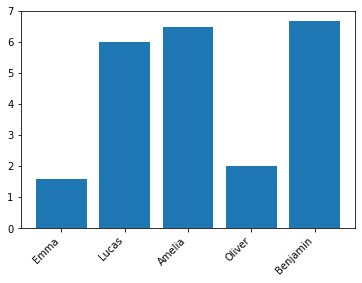

In [4]:
bar_chart(import_students())

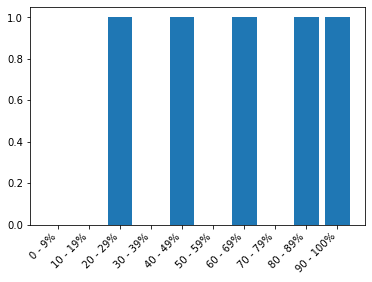

In [5]:
bar_chart_progression(import_students())